In [92]:
from urllib.request import urlopen
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
wiki = "https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States"

In [85]:
def getPresidents(url):
    res = urlopen(url).read().decode('utf-8')
    tableTag = re.findall(r'<table(.*?)</table>', res, re.M | re.I | re.S)[1]
    trTags = re.findall(r'<tr(.*?)</tr>', tableTag, re.M | re.I | re.S)

    urlList = []

    for i in range(0, len(trTags), 1):
        bigTags = re.findall(r'<big>(.*?)</big>', trTags[i], re.M | re.I | re.S)
        for i in range(0, len(bigTags), 1):
            url = re.findall(r'<a href=\"(.*?)\" title=', bigTags[i], re.M | re.I | re.S)
            fullUrl = 'https://en.wikipedia.org' + url[0]
            if fullUrl not in urlList:
                urlList.append(fullUrl)

    return urlList


In [76]:
def getBirthdays(urls):
    columns = ['Name']
    nameArray = []
    bdArray = []
    for i in range(0, len(urls), 1):
        presidentName = (urls[i].split("/")[-1]).replace("_", " ")
        res = urlopen(urls[i]).read().decode('utf-8')
        bornTr = re.findall(r'<span class="bday">(.*?)</span>', res, re.M | re.I | re.S)
        bdArray.append(bornTr[0])
        nameArray.append(presidentName)
    timestamp_date_rng = pd.to_datetime(bdArray, infer_datetime_format=True)
    df = pd.DataFrame(nameArray, index=bdArray, columns=columns)
    return df

In [86]:
allPresidentUrls = getPresidents(wiki)
presidentData = getBirthdays(allPresidentUrls)

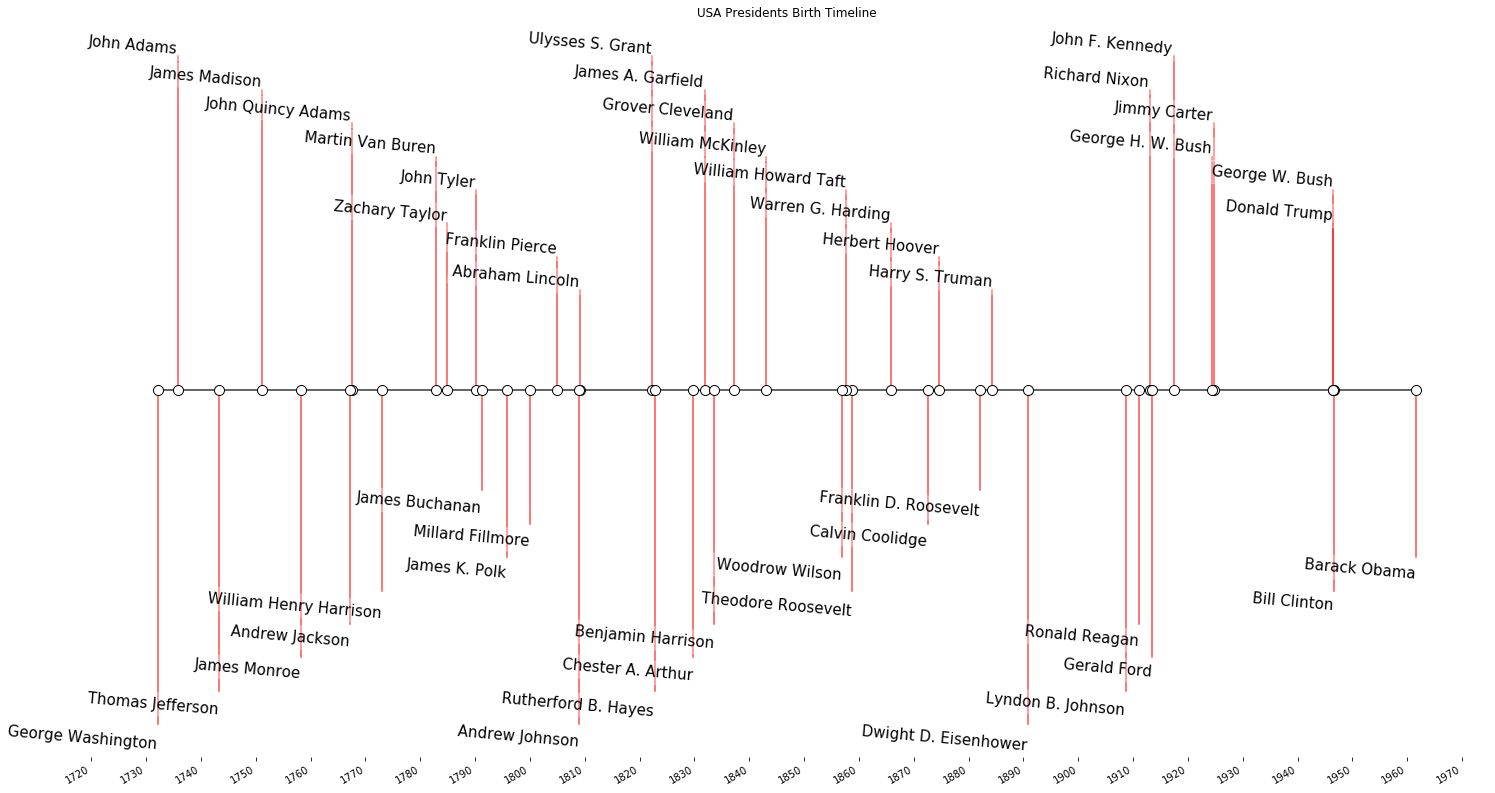

In [114]:
names = presidentData['Name']
datesTemp = presidentData.index

dates = [datetime.strptime(ii, "%Y-%m-%d") for ii in datesTemp]

# levels = np.array([-5, 5, -3, 3, -1, 1])
levels = np.array([-10,10,-9,9,-8,8,-7,7,-6,6,-5,5,-4,4,-3,3])
fig, ax = plt.subplots(figsize=(25, 15))

# Create the base line
start = min(dates)
stop = max(dates)

ax.plot((start, stop), (0, 0), 'k', alpha=.8)

for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 16]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=15,
            backgroundcolor=(1., 1., 1., .3), rotation=-5)
ax.set(title="USA Presidents Birth Timeline")
ax.get_xaxis().set_major_locator(mdates.YearLocator(10))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
fig.autofmt_xdate()
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()

